In [38]:
import pandas_datareader.data as web
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [39]:
dis = pd.read_csv("../../store.csv",header=0,index_col=0)
dis["Date"] = pd.to_datetime(dis["Date"])
dis.set_index('Date', inplace=True)
dis.pop('Volume')
dis.head(10)

,Open,High,Low,Close
Date,,,,
2014-04-10,12937.4,13055.6,12881.2,12949.4
2014-04-11,12822.2,12934.9,12778.0,12840.2
2014-04-15,12830.5,12831.6,12537.7,12579.9
2014-04-16,12557.4,12727.0,12514.8,12563.2
2014-04-17,12564.5,12819.1,12514.8,12787.2
2014-04-21,12845.3,13002.8,12838.8,12958.5
2014-04-22,12989.5,13040.2,12913.9,12987.1
2014-04-23,12961.3,13176.0,12957.9,13122.1
2014-04-25,13134.5,13268.6,12968.8,13034.5


In [40]:
returns = 50*dis.Close.pct_change().dropna()
returns

Date
2014-04-11   -0.421641
2014-04-15   -1.013613
2014-04-16   -0.066376
2014-04-17    0.891493
2014-04-21    0.669810
                ...   
2024-04-03    0.082868
2024-04-04    0.458327
2024-04-05    0.449691
2024-04-08    0.091405
2024-04-09    0.153196
Name: Close, Length: 2469, dtype: float64

Text(0, 0.5, '% Return')

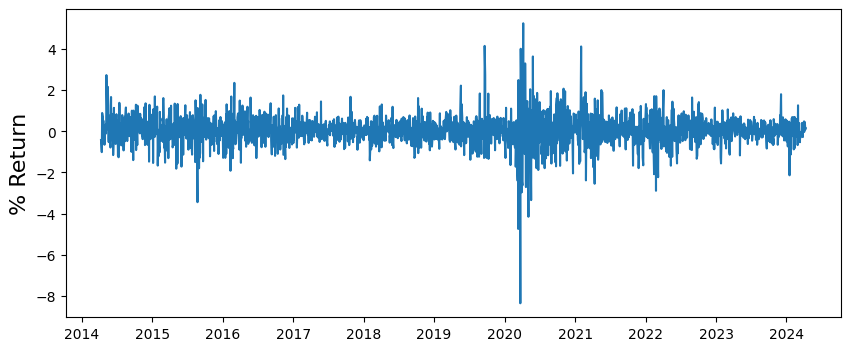

In [41]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('% Return', fontsize=16)

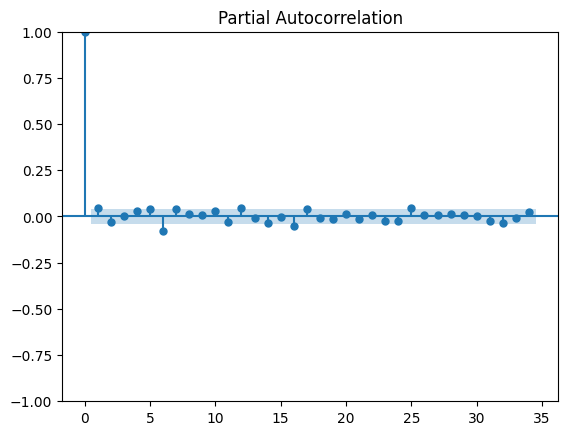

In [42]:
plot_pacf(returns)
plt.show()

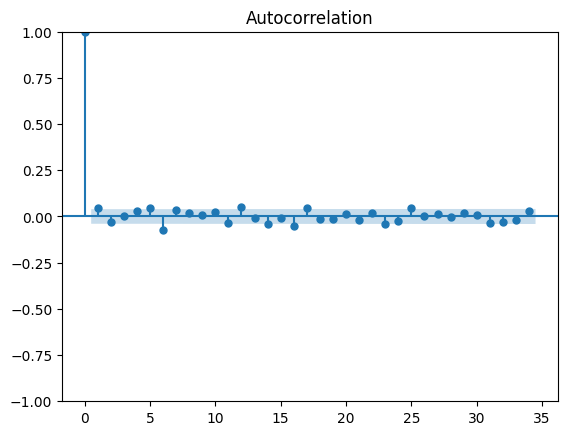

In [43]:
plot_acf(returns)
plt.show()

In [44]:
model = arch_model(returns, p=6, q=6)

In [45]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     16,   Neg. LLF: 15844.244777151569
Iteration:      2,   Func. Count:     36,   Neg. LLF: 9600.117047505344
Iteration:      3,   Func. Count:     55,   Neg. LLF: 4697.781722147034
Iteration:      4,   Func. Count:     71,   Neg. LLF: 3029.0303907434118
Iteration:      5,   Func. Count:     87,   Neg. LLF: 3050.4836607170055
Iteration:      6,   Func. Count:    104,   Neg. LLF: 2637.98686073722
Iteration:      7,   Func. Count:    120,   Neg. LLF: 2341.029844913145
Iteration:      8,   Func. Count:    136,   Neg. LLF: 2457.2230621188437
Iteration:      9,   Func. Count:    152,   Neg. LLF: 2526.6841083492427
Iteration:     10,   Func. Count:    169,   Neg. LLF: 2301.2077424701793
Iteration:     11,   Func. Count:    185,   Neg. LLF: 2269.37386937878
Iteration:     12,   Func. Count:    201,   Neg. LLF: 2247.125045967528
Iteration:     13,   Func. Count:    217,   Neg. LLF: 2244.9858511330185
Iteration:     14,   Func. Count:    233,   Neg. LLF: 2243.

In [46]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2240.63
Distribution:                  Normal   AIC:                           4509.26
Method:            Maximum Likelihood   BIC:                           4590.62
                                        No. Observations:                 2469
Date:                Wed, May 01 2024   Df Residuals:                     2468
Time:                        10:03:48   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0450  1.107e-02      4.068  4.747e-05 [2.334e-02,6.674e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0281  1.978e-02      1.420      0.156 [-1.068e-02,6.684e-02]
alpha[1]       0.0688  2.163e-02      3.178  1.481e-03    [2.636e-02,  0.111]
alpha[2]       0.0599  6.635e-02      0.903      0.367   [-7.016e-02,  0.190]
alpha[3]       0.1027  7.813e-02      1.314      0.189   [-5.044e-02,  0.256]
alpha[4]   8.4604e-03  7.737e-02      0.109      0.913      [ -0.143,  0.160]
alpha[5]       0.0680      0.104      0.656      0.512      [ -0.135,  0.271]
alpha[6]       0.0423  4.410e-02      0.958      0.338   [-4.419e-02,  0.129]
beta[1]    8.7888e-11      0.693  1.269e-10      1.000      [ -1.357,  1.357]
beta[2]    8.8413e-11      0.680  1.300e-10      1.000      [ -1.333,  1.333]
beta[3]    8.9421e-11      0.428  2.090e-10      1.000      [ -0.838,  0.838]
beta[4]        0.2139      0.369      0.580      0.562      [ -0.509,  0.936]
beta[5]    9.3804e-11      0.360  2.608e-10      1.000      [ -0.705,  0.705]
beta[6]        0.3802      0.348      1.091      0.275      [ -0.303,  1.063]
=============================================================================

Covariance estimator: robust
"""

In [47]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [48]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

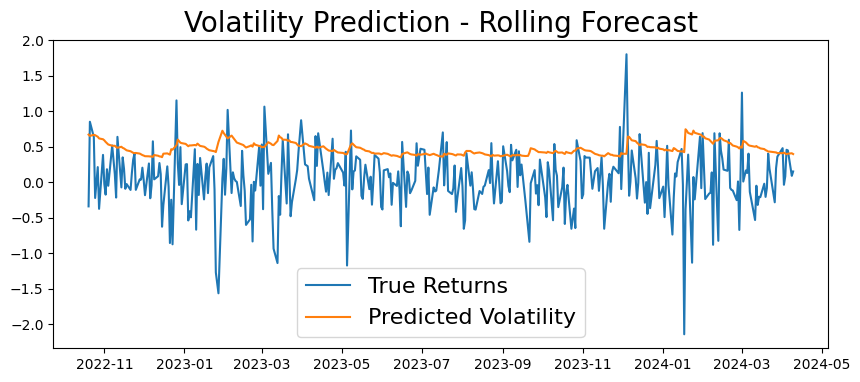

In [49]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [51]:
spy = pd.read_csv("../../store.csv",header=0,index_col=0)
spy["Date"] = pd.to_datetime(spy["Date"])
spy.set_index('Date', inplace=True)
spy.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2014-04-10,12937.4,13055.6,12881.2,12949.4,0
2014-04-11,12822.2,12934.9,12778.0,12840.2,0
2014-04-15,12830.5,12831.6,12537.7,12579.9,0
2014-04-16,12557.4,12727.0,12514.8,12563.2,0
2014-04-17,12564.5,12819.1,12514.8,12787.2,0
2014-04-21,12845.3,13002.8,12838.8,12958.5,0
2014-04-22,12989.5,13040.2,12913.9,12987.1,0
2014-04-23,12961.3,13176.0,12957.9,13122.1,0
2014-04-25,13134.5,13268.6,12968.8,13034.5,0


In [52]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

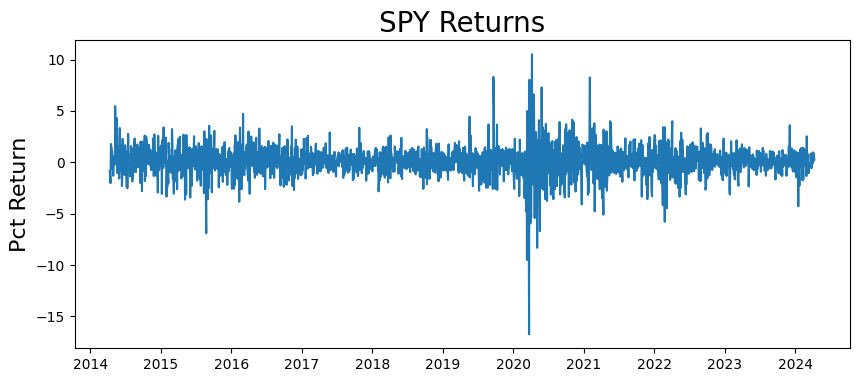

In [53]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

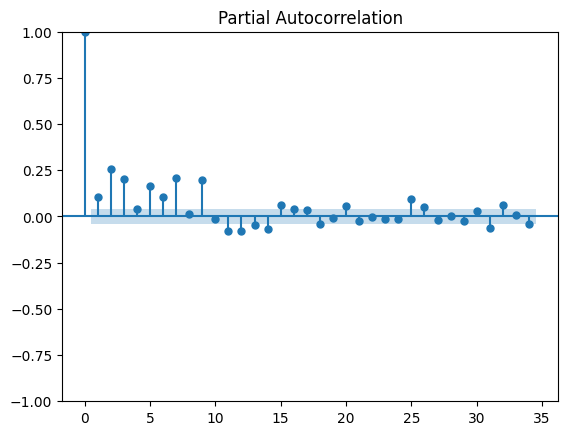

In [54]:
plot_pacf(returns**2)
plt.show()

In [55]:
model = arch_model(returns, p=2, q=2)

In [56]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3309094231716.9014
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1986920923.8712919
Iteration:      3,   Func. Count:     29,   Neg. LLF: 5467.671657338031
Iteration:      4,   Func. Count:     38,   Neg. LLF: 3990.128853563045
Iteration:      5,   Func. Count:     46,   Neg. LLF: 3978.4925590865264
Iteration:      6,   Func. Count:     54,   Neg. LLF: 3978.7267141954158
Iteration:      7,   Func. Count:     62,   Neg. LLF: 3974.9486520078067
Iteration:      8,   Func. Count:     70,   Neg. LLF: 3980.1134371050084
Iteration:      9,   Func. Count:     78,   Neg. LLF: 3978.4689006691856
Iteration:     10,   Func. Count:     86,   Neg. LLF: 3960.979041692734
Iteration:     11,   Func. Count:     94,   Neg. LLF: 3961.8549480859665
Iteration:     12,   Func. Count:    102,   Neg. LLF: 3966.1432414331302
Iteration:     13,   Func. Count:    110,   Neg. LLF: 3958.416695243433
Iteration:     14,   Func. Count:    117,   Neg. LLF: 3

In [57]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3956.53
Distribution:                  Normal   AIC:                           7925.07
Method:            Maximum Likelihood   BIC:                           7959.94
                                        No. Observations:                 2469
Date:                Wed, May 01 2024   Df Residuals:                     2468
Time:                        10:03:53   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0923  2.227e-02      4.145  3.399e-05 [4.865e-02,  0.136]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0464  1.645e-02      2.824  4.745e-03 [1.421e-02,7.867e-02]
alpha[1]       0.1014  3.967e-02      2.556  1.058e-02   [2.366e-02,  0.179]
alpha[2]       0.0475  5.821e-02      0.815      0.415  [-6.663e-02,  0.162]
beta[1]    8.6264e-15      0.315  2.740e-14      1.000     [ -0.617,  0.617]
beta[2]        0.8285      0.294      2.819  4.817e-03     [  0.252,  1.405]
============================================================================

Covariance estimator: robust
"""

In [58]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [59]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

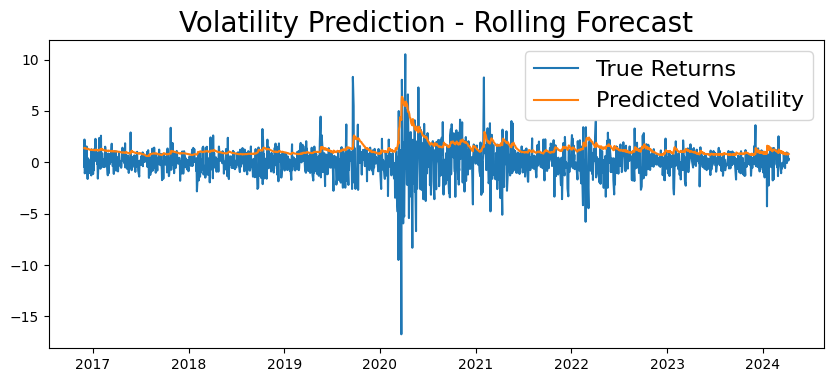

In [60]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [61]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [62]:
from dateutil.relativedelta import relativedelta

In [63]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + relativedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

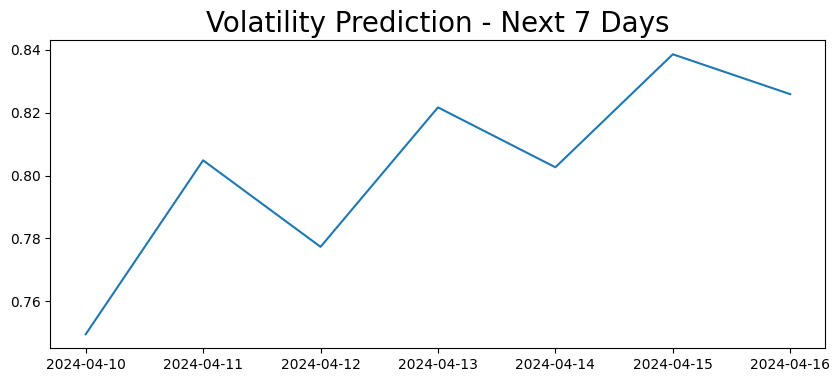

In [64]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)